# 라이브러리 및 데이터 불러오기

In [20]:
import io, os, sys, setuptools, tokenize
import prophet

import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime
from pandas_datareader import data

from prophet import Prophet
import numpy as np 
import seaborn as sns
from prophet.plot import add_changepoints_to_plot
import random

In [21]:
agri = pd.read_csv('../data/Agri_all.csv')
agri

,YMD,YM,MD,Product,Price,KRW_USD_EXR,Annual_Call_Rate,item_PPI,item_CPI,Food_Price_Index,Cereals_Price_Index,DayAvg_Temperature,DayDiff_Temperature,DayAvg_RelativeHumidity,DaySum_Rainfall,DayAvg_WindSpeed,DaySum_Sunshine,Warning_Count
0,2005-01-03,200501,103,마늘,20785.714286,1013.00,3.33,49.58,58.27,65.4,60.5,4.400000,12.800000,35.200000,0.000000,2.600000,1.600000,0.000000
1,2005-01-04,200501,104,마늘,20785.714286,1013.00,3.33,49.58,58.27,65.4,60.5,-0.200000,8.800000,26.000000,0.000000,2.800000,2.800000,0.000000
2,2005-01-05,200501,105,마늘,20928.571429,1013.00,3.33,49.58,58.27,65.4,60.5,-1.400000,11.200000,33.400000,0.000000,0.600000,3.200000,0.000000
3,2005-01-06,200501,106,마늘,21071.428571,1013.00,3.33,49.58,58.27,65.4,60.5,2.800000,7.800000,31.200000,1.200000,1.200000,2.600000,0.000000
4,2005-01-07,200501,107,마늘,21071.428571,1013.00,3.33,49.58,58.27,65.4,60.5,2.000000,7.600000,28.400000,0.000000,2.800000,2.800000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15875,2020-12-24,202012,1224,고구마,10258.695652,1180.05,0.70,137.90,96.13,108.6,116.4,3.529412,8.588235,59.117647,0.000000,1.705882,3.529412,0.000000
15876,2020-12-28,202012,1228,고구마,10431.323529,1180.05,0.70,137.90,96.13,108.6,116.4,3.941176,11.941176,80.352941,0.058824,0.411765,3.117647,0.000000
15877,2020-12-29,202012,1229,고구마,10431.323529,1180.05,0.70,137.90,96.13,108.6,116.4,1.590909,9.227273,77.227273,1.272727,1.863636,0.636364,0.772727
15878,2020-12-30,202012,1230,고구마,10460.735294,1180.05,0.70,137.90,96.13,108.6,116.4,-5.500000,6.250000,65.375000,0.291667,3.958333,2.666667,0.833333


# 감자

In [22]:
potato = agri.loc[agri['Product'] == '감자']
potato['YMD'] = pd.to_datetime(potato['YMD'])
potato = potato.reset_index()
potato = potato.drop(columns='index')
potato.tail()

C:\Users\sdy59\AppData\Local\Temp\ipykernel_9752\362457114.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  potato['YMD'] = pd.to_datetime(potato['YMD'])


,YMD,YM,MD,Product,Price,KRW_USD_EXR,Annual_Call_Rate,item_PPI,item_CPI,Food_Price_Index,Cereals_Price_Index,DayAvg_Temperature,DayDiff_Temperature,DayAvg_RelativeHumidity,DaySum_Rainfall,DayAvg_WindSpeed,DaySum_Sunshine,Warning_Count
3965,2020-12-24,202012,1224,감자,4937.806452,1180.05,0.7,107.24,102.43,108.6,116.4,3.481481,8.555556,58.259259,0.000000,2.148148,4.259259,0.333333
3966,2020-12-28,202012,1228,감자,5033.016393,1180.05,0.7,107.24,102.43,108.6,116.4,3.750000,11.416667,82.083333,0.000000,0.333333,3.541667,0.041667
3967,2020-12-29,202012,1229,감자,5015.548387,1180.05,0.7,107.24,102.43,108.6,116.4,1.714286,9.035714,83.107143,0.678571,1.571429,0.750000,0.785714
3968,2020-12-30,202012,1230,감자,5016.354839,1180.05,0.7,107.24,102.43,108.6,116.4,-5.766667,8.166667,62.033333,1.800000,3.866667,2.600000,0.833333
3969,2020-12-31,202012,1231,감자,5094.163934,1180.05,0.7,107.24,102.43,108.6,116.4,-6.076923,9.730769,62.192308,0.307692,1.807692,3.692308,0.615385


In [24]:
# 2005~2019년 훈련세트 , 2020년~ 테스트세트
train_df = potato.iloc[:3722]      
val_df = potato.iloc[3722:]

,YMD,YM,MD,Product,Price,KRW_USD_EXR,Annual_Call_Rate,item_PPI,item_CPI,Food_Price_Index,Cereals_Price_Index,DayAvg_Temperature,DayDiff_Temperature,DayAvg_RelativeHumidity,DaySum_Rainfall,DayAvg_WindSpeed,DaySum_Sunshine,Warning_Count
0,2005-01-03,200501,103,감자,6323.101449,1013.0,3.33,71.15,69.162,65.4,60.5,4.500000,6.750000,47.750000,1.000000,3.750000,0.250000,0.000000
1,2005-01-04,200501,104,감자,6233.314286,1013.0,3.33,71.15,69.162,65.4,60.5,-2.250000,8.000000,36.250000,0.000000,3.000000,3.500000,0.000000
2,2005-01-05,200501,105,감자,6332.028169,1013.0,3.33,71.15,69.162,65.4,60.5,-3.500000,11.500000,44.750000,0.000000,0.500000,4.250000,0.000000
3,2005-01-06,200501,106,감자,6417.352113,1013.0,3.33,71.15,69.162,65.4,60.5,1.500000,7.000000,45.250000,1.500000,1.500000,2.250000,0.000000
4,2005-01-07,200501,107,감자,6581.362319,1013.0,3.33,71.15,69.162,65.4,60.5,0.250000,9.250000,38.750000,0.000000,3.000000,4.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3717,2019-12-24,201912,1224,감자,3054.824324,1157.8,1.59,70.29,74.752,101.0,97.4,1.130435,10.608696,74.826087,0.000000,0.565217,3.652174,0.000000
3718,2019-12-26,201912,1226,감자,3053.405405,1157.8,1.59,70.29,74.752,101.0,97.4,2.782609,4.434783,72.956522,1.434783,1.521739,0.043478,0.260870
3719,2019-12-27,201912,1227,감자,3091.917808,1157.8,1.59,70.29,74.752,101.0,97.4,0.043478,7.782609,58.521739,0.000000,1.652174,4.260870,0.217391
3720,2019-12-30,201912,1230,감자,3090.849315,1157.8,1.59,70.29,74.752,101.0,97.4,4.074074,9.444444,80.296296,0.333333,1.777778,0.888889,0.962963


In [27]:
train1 = pd.DataFrame({'ds':train_df['YMD'], 'y':train_df['Price']})
train1.reset_index(inplace=True, drop=True)
train1['y'] = train1['y'].astype('int')

In [28]:
val1 = pd.DataFrame({'ds':val_df['YMD'], 'y':val_df['Price']})
val1.reset_index(inplace=True, drop=True)
val1['y'] = val1['y'].astype('int')

In [29]:
m = Prophet()
m.fit(train1)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
c:\Users\sdy59\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [152]:
future = m.make_future_dataframe(periods=365)  
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

c:\Users\sdy59\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\sdy59\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
0,2005-01-03,5003.650560,2604.027343,7317.243700
1,2005-01-04,5099.710907,2595.005699,7592.298951
2,2005-01-05,5261.983673,2921.404975,7803.104579
3,2005-01-06,5376.672319,2835.046879,7774.710065
4,2005-01-07,5491.725349,3055.571854,7741.189899
...,...,...,...,...
4082,2020-12-26,6247.986759,3906.911910,8663.411017
4083,2020-12-27,4139.048554,1737.683423,6565.573509
4084,2020-12-28,6230.028641,3808.862947,8504.200679
4085,2020-12-29,6303.616104,3812.599848,8713.079529


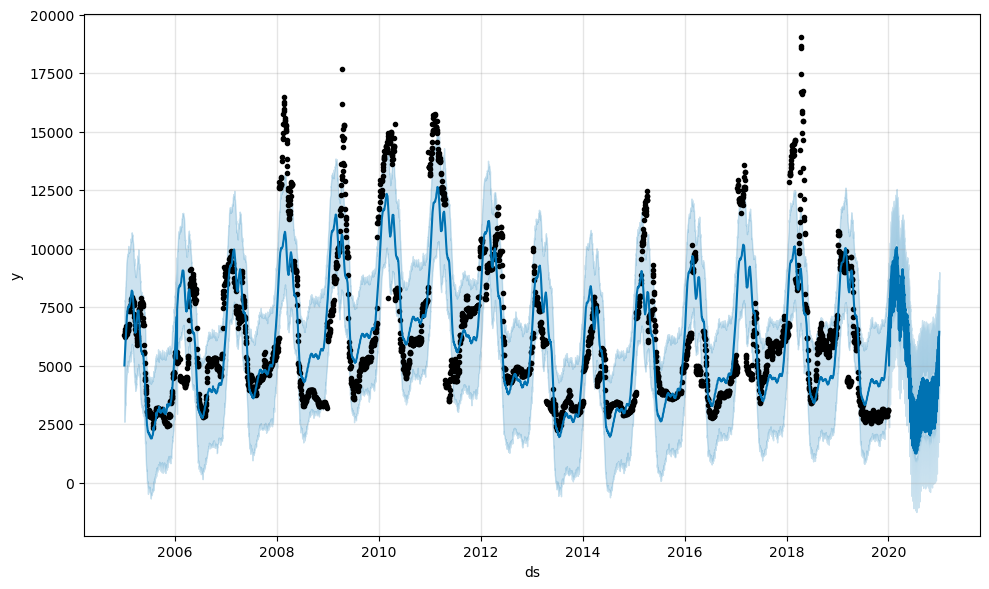

In [153]:
m.plot(forecast);

c:\Users\sdy59\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\sdy59\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


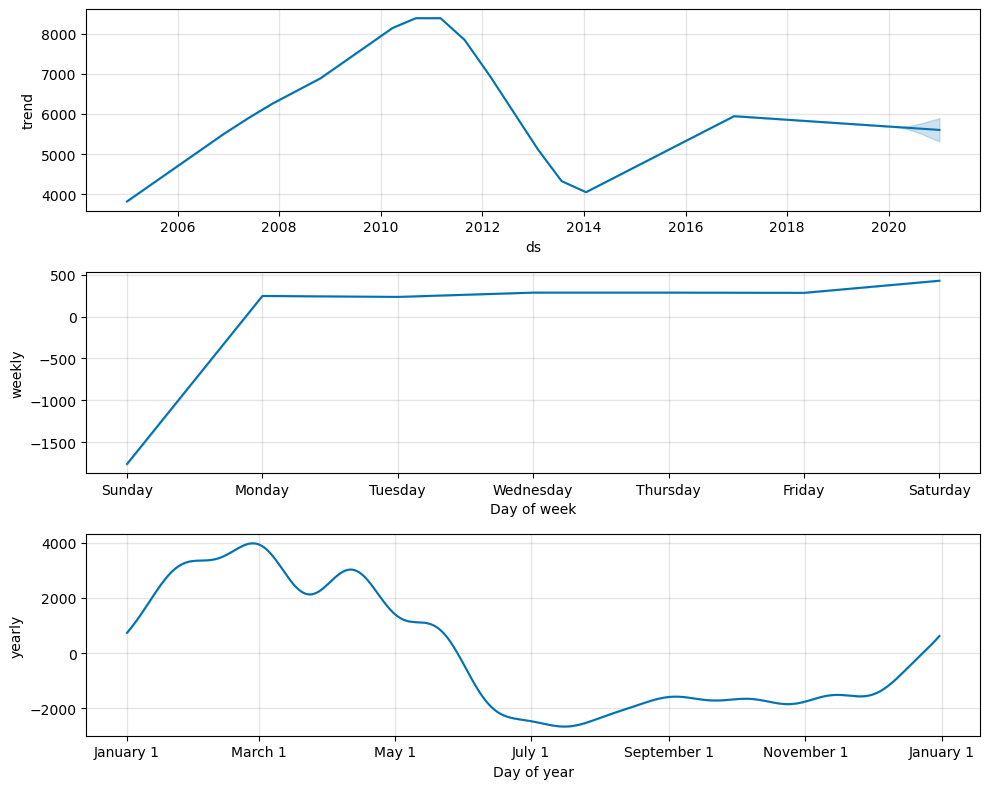

In [154]:
fig2 = m.plot_components(forecast, figsize=(10,8))

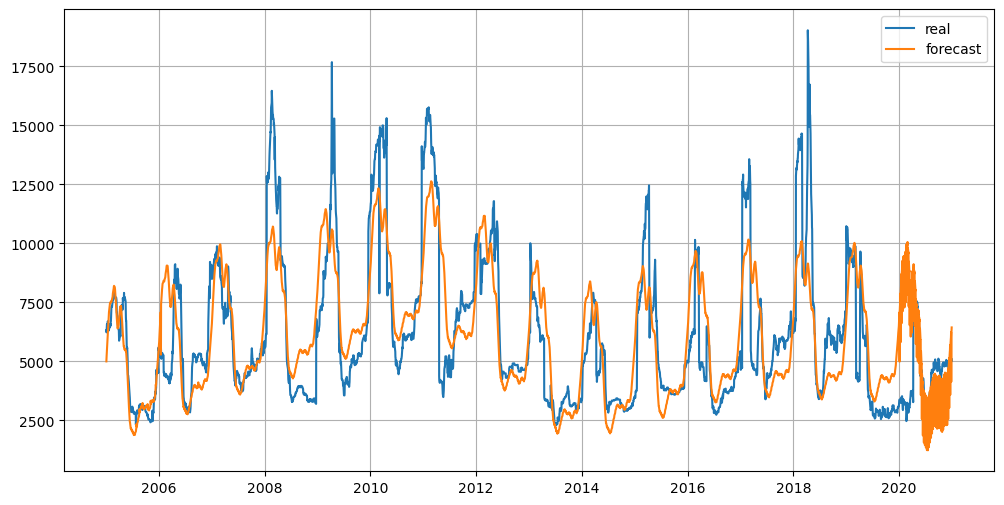

In [155]:
plt.figure(figsize=(12,6))
plt.plot(potato['YMD'], potato['Price'], label='real')    
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')  
plt.grid()
plt.legend()
plt.show()

# holiday

In [156]:
# 휴일 생성
# import holidays

# # 필요한 날짜만큼 생성
# date_list = pd.date_range('2005-01-01', '2020-12-31')

# # 한국 휴일 객체 생성
# kr_holidays = holidays.KR()

# # generate holiday table
# holiday_df = pd.DataFrame(columns=['ds','holiday'])
# holiday_df['ds'] = sorted(date_list)
# holiday_df['holiday'] = holiday_df.ds.apply(lambda x: kr_holidays.get(x) if x in kr_holidays else 'non-holiday')
# holiday_df.head()

In [157]:
# start_date = pd.to_datetime('2018-01-01') ## 시작 날짜
# end_date = pd.to_datetime('2018-12-31') ## 마지막 날짜
 
# dates = pd.date_range(start_date,end_date,freq='D') ## 일단위로 생성
# dates = pd.DataFrame(dates)
# dates['holiday'] = 'corona'
# dates.rename(columns={0:'ds'}, inplace=True)
# dates

In [96]:
holiday_c = pd.DataFrame({
'holiday': 'corona',
'ds': pd.to_datetime(['2018-01-18', '2018-01-19', '2018-03-02',
                      '2018-03-05', '2018-03-21', '2018-04-11',
                      '2018-04-25'])
})
holiday_c.head()

,holiday,ds
0,corona,2018-01-18
1,corona,2018-01-19
2,corona,2018-03-02
3,corona,2018-03-05
4,corona,2018-03-21


# gridsearch

In [35]:
# from sklearn.model_selection import ParameterGrid
# params_grid = {'changepoint_prior_scale': [0.05, 0.1, 0.5, 1.0, 5.0, 10.0],
#                'seasonality_mode':('multiplicative','additive'),
#                'seasonality_prior_scale': [0.05, 0.1, 1.0, 10.0],
#                'holidays_prior_scale' : [0.1, 1, 5, 10],
#                }

# grid = ParameterGrid(params_grid)
# cnt = 0
# for p in grid:
#     cnt = cnt+1

# print('Total Possible Models',cnt)

In [36]:
# from sklearn.metrics import mean_absolute_error

# model_parameters1 = pd.DataFrame(columns = ['MAE','Parameters'])
# for p in grid:
#     test = pd.DataFrame()
#     print(p)
#     random.seed(0)
#     train_model1 =Prophet(changepoint_prior_scale = p['changepoint_prior_scale'],
#                          seasonality_mode = p['seasonality_mode'],
#                          seasonality_prior_scale = p['seasonality_prior_scale'],
#                          weekly_seasonality=True,
#                          daily_seasonality = True,
#                          yearly_seasonality = True,
#                          interval_width=0.95)
#     train_model1.fit(train1)
#     train_forecast = train_model1.make_future_dataframe(periods=248, freq='D',include_history = False)
#     train_forecast = train_model1.predict(train_forecast)
#     test=train_forecast[['ds','yhat']]
#     MAE = mean_absolute_error(val1['y'],abs(test['yhat']))
#     print('Mean Absolute Error(MAE)------------------------------------',MAE)
#     model_parameters1 = model_parameters1.append({'MAE':MAE,'Parameters':p},ignore_index=True)

In [37]:
# parameters1 = model_parameters1.sort_values(by=['MAE'])
# parameters1 = parameters1.reset_index(drop=True)
# parameters1.loc[0]['Parameters']

# grid_search 결과

In [98]:
final_model1 = Prophet(changepoint_prior_scale= 0.5,
                      holidays_prior_scale = 0.1,
                      seasonality_mode = 'multiplicative',
                      seasonality_prior_scale = 0.05,
                      weekly_seasonality=True,
                      daily_seasonality = True,
                      yearly_seasonality = True,
                      interval_width=0.8,
                      holidays=holiday_c)
final_model1.fit(train1)

c:\Users\sdy59\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [144]:
future1 = final_model1.make_future_dataframe(periods=365, freq='D')
forecast1 = final_model1.predict(future1)
forecast1.yhat = np.where(forecast.yhat < 0, 0, forecast.yhat)
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

c:\Users\sdy59\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\sdy59\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
0,2005-01-03,5003.650560,3731.279486,7484.211216
1,2005-01-04,5099.710907,3838.787669,7713.572449
2,2005-01-05,5261.983673,3882.282207,7958.376669
3,2005-01-06,5376.672319,4008.970442,8074.274040
4,2005-01-07,5491.725349,4087.978502,7959.888565
...,...,...,...,...
4082,2020-12-26,6247.986759,-486.055627,11781.502452
4083,2020-12-27,4139.048554,-427.018738,11374.382986
4084,2020-12-28,6230.028641,-747.046799,11779.927118
4085,2020-12-29,6303.616104,-1039.846519,12130.175011


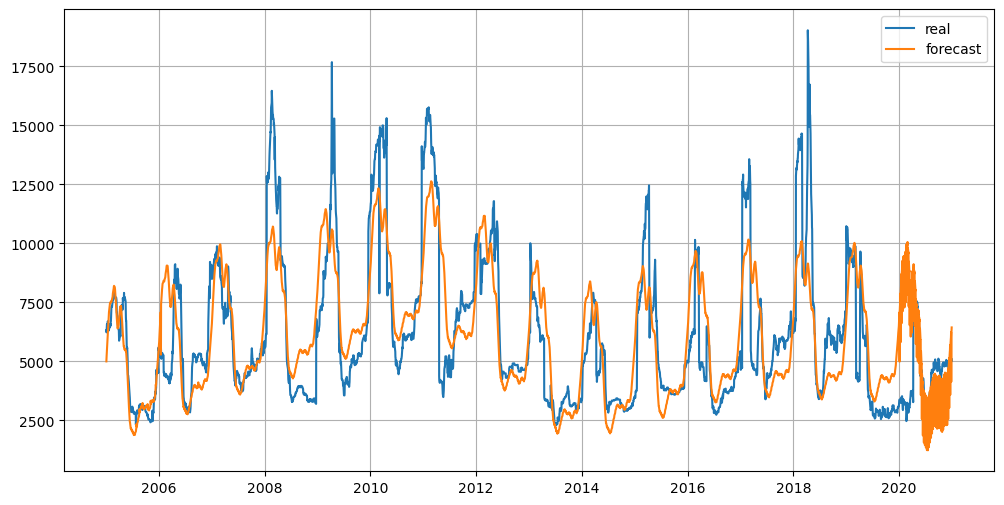

In [145]:
plt.figure(figsize=(12,6))
plt.plot(potato['YMD'], potato['Price'], label='real')
plt.plot(forecast1['ds'], forecast1['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()

# 변수 추가 및 holiday 추가

In [158]:
train2 = pd.DataFrame({'ds':train_df['YMD'], 'y':train_df['Price']})
train2.reset_index(inplace=True, drop=True)
train2['y'] = train2['y'].astype('int')
val2 = pd.DataFrame({'ds':val_df['YMD'], 'y':val_df['Price']})
val2.reset_index(inplace=True, drop=True)
val2['y'] = val2['y'].astype('int')

In [160]:
train2_x = train_df[['DayAvg_Temperature',
       'DayDiff_Temperature','DaySum_Rainfall',
       'Warning_Count']]

In [161]:
train2  = pd.concat([train2, train2_x],axis=1) 

In [163]:
final_model2 = Prophet(changepoint_prior_scale= 0.5,
                      holidays_prior_scale = 0.1,
                      seasonality_mode = 'multiplicative',
                      seasonality_prior_scale = 0.05,
                      weekly_seasonality=True,
                      daily_seasonality = False,
                      yearly_seasonality = True,
                      interval_width=0.95,
                      holidays=holiday_c)
final_model2.fit(train2)

c:\Users\sdy59\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [164]:
future2 = final_model2.make_future_dataframe(periods=365, freq='D')
forecast2 = final_model2.predict(future2)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

c:\Users\sdy59\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\sdy59\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
0,2005-01-03,5724.680144,2936.228319,8492.256153
1,2005-01-04,5797.789836,2878.666893,9026.704326
2,2005-01-05,5910.100004,3243.975793,8972.594679
3,2005-01-06,5983.669310,3220.926070,8919.547485
4,2005-01-07,6073.583378,3025.700679,9097.542219
...,...,...,...,...
4082,2020-12-26,5097.737195,-7474.894338,17022.783445
4083,2020-12-27,4950.621548,-7906.673105,16476.919722
4084,2020-12-28,5567.084027,-7489.605677,19353.740679
4085,2020-12-29,5628.669200,-8413.721600,18289.677338


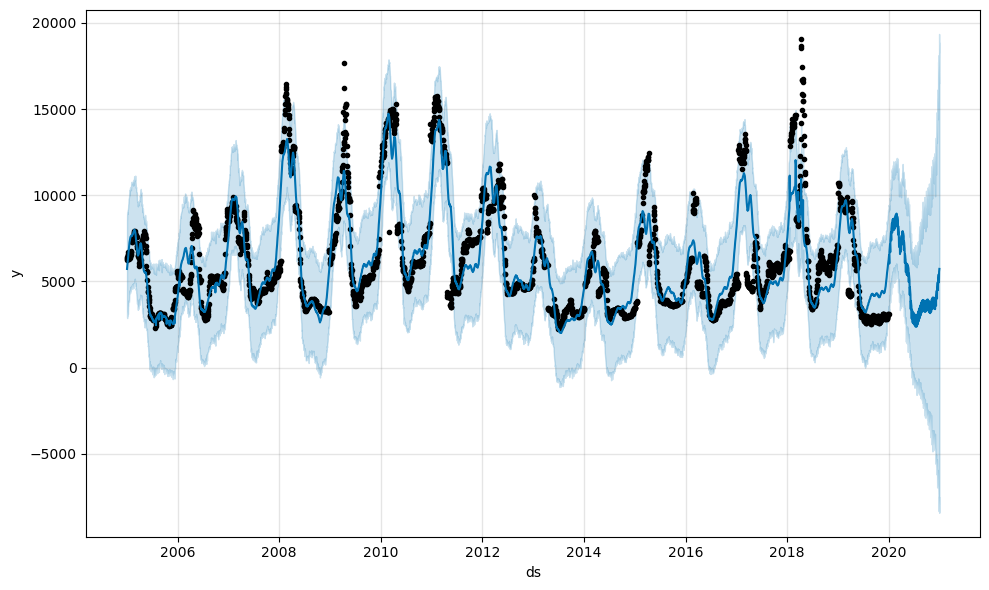

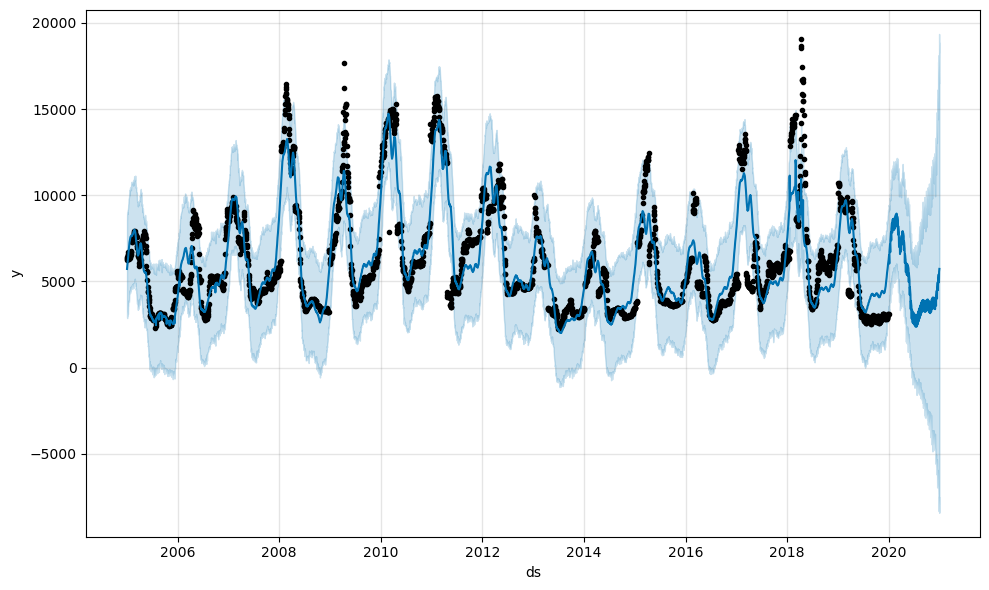

In [165]:
m.plot(forecast2)

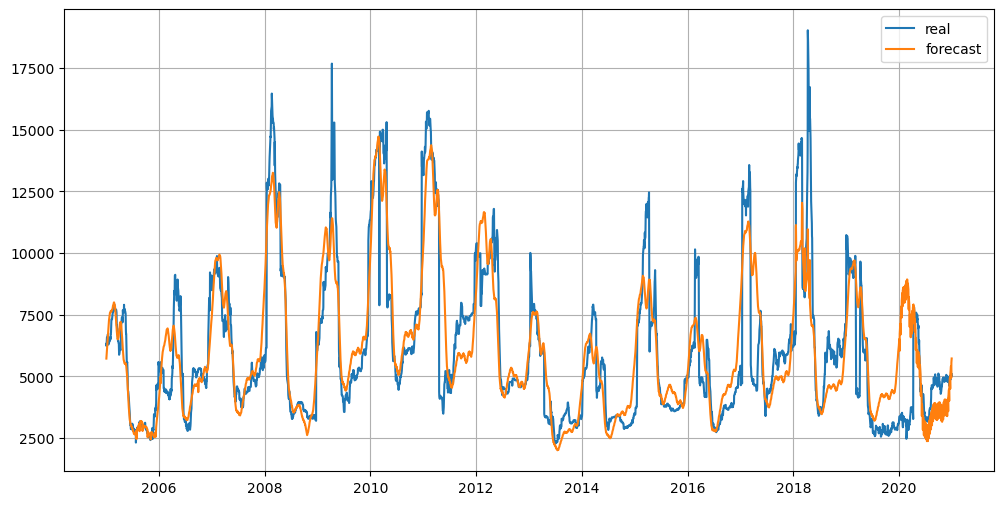

In [166]:
plt.figure(figsize=(12,6))
plt.plot(potato['YMD'], potato['Price'], label='real')
plt.plot(forecast2['ds'], forecast2['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()